# Notebook 4: Layer 3 - Responses & Narratives
Shannon Wietsma - S4147472

In [1]:
#%pip install seaborn

In [2]:
import pandas as pd
import regex as re
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import ast
from collections import defaultdict

# Load the files

In [3]:
# Loading the csv file which includes the analysis performed for layer 2 and layer 3 (writing prompts). 
corpus_analysis = pd.read_csv('corpus_analysis_after_layer_3_prompts.csv')
corpus_analysis = corpus_analysis.drop('Unnamed: 0.1', axis = 1)
corpus_analysis.sample(5)

,blog_name,title,description,post_url,date (YYYY-MM-DD),hashtags,short_url,writing_prompt_id,writing_prompt,total_amount_notes,...,Unnamed: 0,subtheme,prompt framing,reference,reader identification,word_count_prompt,pos_tags_prompt,tokens_prompt,pos_counts_prompt,theme
712,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. L...,https://writing-prompt-s.tumblr.com/post/71043...,27-2-2023,"['writers', 'writers on tumblr', 'writing prom...",https://tmblr.co/ZCDX7hdR_FWtuW00,wp038,A main character is trapped in a fantasy iseka...,3855,...,35,"Fantasy and the Supernatural, Identity and Sel...",description,"main character, fantasy isekai world, new life...",implicit,32,"['DT', 'JJ', 'NN', 'VBZ', 'VBN', 'IN', 'DT', '...","['A', 'main', 'character', 'is', 'trapped', 'i...","{'DT': 5, 'JJ': 4, 'NN': 9, 'VBZ': 1, 'VBN': 3...","['Fantasy and Imaginative Realms', 'Humor, Sat..."
500,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. L...,https://writing-prompt-s.tumblr.com/post/71126...,8-3-2023,"['writers', 'writers on tumblr', 'writing prom...",https://tmblr.co/ZCDX7hdUw2SKau00,wp026,You’re a historian going through memoirs of fa...,3632,...,25,"Fantasy and the Supernatural, Time and Percept...",description,"you/historian, pattern, man with long blonde h...",you,54,"['PRP', 'VBP', 'VB', 'DT', 'JJ', 'VBG', 'IN', ...","['You', '’', 're', 'a', 'historian', 'going', ...","{'PRP': 3, 'VBP': 3, 'VB': 1, 'DT': 6, 'JJ': 6...","['Fantasy and Imaginative Realms', 'Existentia..."
121,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. L...,https://writing-prompt-s.tumblr.com/post/71170...,13-3-2023,"['writers', 'writers on tumblr', 'writing prom...",https://tmblr.co/ZCDX7hdWVrIwiy00,wp007,The wizard in your party only knows one spell....,16002,...,6,"Good vs. Evil, Power and Corruption, Fantasy a...",statement,"wizard, you, party, assassin",you,19,"['DT', 'NN', 'IN', 'PRP$', 'NN', 'RB', 'VBZ', ...","['The', 'wizard', 'in', 'your', 'party', 'only...","{'DT': 2, 'NN': 4, 'IN': 2, 'PRP$': 1, 'RB': 2...","['Fantasy and Imaginative Realms', 'Moral Stru..."
1560,creativepromptsforwriting,Creative Writing Prompts,"Writing Sideblog by <a href=""https://agirlname...",https://creativepromptsforwriting.tumblr.com/p...,26-2-2023,"['creative writing', 'smut', 'smutty dialogue'...",https://tmblr.co/Z_s_RjdRcDN-Sq00,wp196,creativepromptsforwriting:Smutty One-Liners Pa...,1123,...,167,"Love and Relationships, Loneliness and Connect...",collection,smutty one-liners,implicit,502,"['NN', ':', 'JJ', 'NNS', 'NNP', 'NNP', 'CC', '...","['creativepromptsforwriting', ':', 'Smutty', '...","{'NN': 92, ':': 111, 'JJ': 54, 'NNS': 17, 'NNP...","['Relationships', 'Relationship and Interperso..."
182,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. L...,https://writing-prompt-s.tumblr.com/post/71162...,12-3-2023,"['writers', 'writers on tumblr', 'writing prom...",https://tmblr.co/ZCDX7hdWCSGZWi01,wp010,"Due to a series of ""unfornate "" accidents, eve...",6175,...,9,"Good vs. Evil, Redemption and Second Chances, ...",description,"you, secret identity, supervillain, upstart",you,53,"['JJ', 'TO', 'DT', 'NN', 'IN', '``', 'JJ', '``...","['Due', 'to', 'a', 'series', 'of', '``', 'unfo...","{'JJ': 7, 'TO': 2, 'DT': 7, 'NN': 10, 'IN': 6,...","['Power', 'The Path of Transformation', 'Moral..."


In [4]:
# Load the csv file which includes the analysis performed for layer 3 (responses / narratives).
content_response = pd.read_csv("responses_content_analysis.csv", sep = ',', encoding = 'utf-8-sig')
content_response.sample(5)

,response_id,containing_elements,continuation_of_prompt,considered_as_narrative,narrative_agent,type_of_narrator
988,wp061r016,yes,yes,yes,TUMBLR,CN
1518,wp196r005,no,no,no,NaN,NaN
1537,wp199r004,yes,no,no,NaN,NaN
34,wp002r015,no,no,no,NaN,NaN
25,wp002r006,no,no,no,NaN,NaN


In [5]:
# Loading the original corpus
old_corpus = pd.read_csv("corpus.csv", sep = ';', encoding = 'utf-8-sig')
old_corpus.sample(5)

,blog_name,title,description,post_url,date (YYYY-MM-DD),hashtags,short_url,writing_prompt_id,writing_prompt,total_amount_notes,response_id,response,blog_name_response,type_of_response,reblog_parent_name
1661,creativepromptsforwriting,Creative Writing Prompts,"Writing Sideblog by <a href=""https://agirlname...",https://creativepromptsforwriting.tumblr.com/p...,4-3-2023,"['support', 'members', 'ko-fi', 'gift', 'promp...",https://tmblr.co/Z_s_RjdTerHYqa00,wp179,"<p class=""npf_link"" data-npf=\'{""type"":""link"",...",60,wp179r004,#random #rb,mysandwichranaway,reblog,creativepromptsforwriting
309,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. L...,https://writing-prompt-s.tumblr.com/post/71152...,11-3-2023,"['writers', 'writers on tumblr', 'writing prom...",https://tmblr.co/ZCDX7hdVrRjGaW00,wp016,<p>You are a werewolf trying your best to live...,3726,wp016r010,Allergies.,story-chaotic-brain,reply,NaN
1919,creativepromptsforwriting,Creative Writing Prompts,"Writing Sideblog by <a href=""https://agirlname...",https://creativepromptsforwriting.tumblr.com/p...,26-2-2023,"['writing encouragement', 'writing', 'writeblr...",https://tmblr.co/Z_s_RjdRb_pw8u00,wp197,"<p><a class=""tumblr_blog"" href=""https://creati...",7952,wp197r015,#thank,melodyofthevoid,reblog,creativepromptsforwriting
1677,creativepromptsforwriting,Creative Writing Prompts,"Writing Sideblog by <a href=""https://agirlname...",https://creativepromptsforwriting.tumblr.com/p...,4-3-2023,"['blind date prompts', 'blind dates', 'writing...",https://tmblr.co/Z_s_RjdTYMLV8q00,wp180,<h1>Blind Date Prompts</h1><ol><li>Character A...,548,wp180r016,#blind date prompts,starspromptarchive,reblog,creativepromptsforwriting
2430,promptsforthestrugglingauthor,Writing Prompts Daily,<a href=https://promptsforthestrugglingauthor....,https://www.tumblr.com/blog/view/promptsforthe...,21-2-2023,NaN,https://tmblr.co/ZnM30fdPoY9uam00,wp245,"<p><a class=""tumblr_blog"" href=""https://www.tu...",215,wp245r015,#prompts #campaign: no story here,worldsneverfilled,reblog,promptsforthestrugglingauthor


In [6]:
# Merge dataframes
corpus_analysis_complete = pd.merge(corpus_analysis, content_response, on = 'response_id', how = 'inner')
corpus_analysis_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   blog_name                2069 non-null   object
 1   title                    2069 non-null   object
 2   description              2069 non-null   object
 3   post_url                 2069 non-null   object
 4   date (YYYY-MM-DD)        2069 non-null   object
 5   hashtags                 1752 non-null   object
 6   short_url                2069 non-null   object
 7   writing_prompt_id        2069 non-null   object
 8   writing_prompt           2069 non-null   object
 9   total_amount_notes       2069 non-null   int64 
 10  response_id              2069 non-null   object
 11  response                 2069 non-null   object
 12  blog_name_response       2069 non-null   object
 13  type_of_response         2068 non-null   object
 14  reblog_parent_name       1514 non-null  

### 1 - The amount of responses

In [7]:
len(old_corpus)

2500

### 2 - The amount of words per response

In [8]:
def count_words(text):
    clean_text = str(text).strip()  # Convert to string and remove leading/trailing whitespace
    words = clean_text.split()  # Split the text into words
    return len(words)  # Return the word count

In [9]:
# Apply the word count function to the 'Response' column
corpus_analysis_complete['word_count_response'] = corpus_analysis_complete['response'].apply(count_words)

corpus_analysis_complete[['response_id','word_count_response']]

,response_id,word_count_response
0,wp001r001,5
1,wp001r002,17
2,wp001r003,13
3,wp001r004,32
4,wp001r005,5
...,...,...
2064,wp250r001,130
2065,wp250r002,14
2066,wp250r003,4
2067,wp250r004,2


In [10]:
# To get summary statistics
corpus_analysis_complete['word_count_response'].describe()

count    2069.000000
mean       18.820203
std        72.591479
min         1.000000
25%         3.000000
50%         7.000000
75%        15.000000
max      2065.000000
Name: word_count_response, dtype: float64

### 3 - The type of words per response 

In [11]:
def extract_pos_tags_and_tokens(text):
    clean_text = str(text).strip()  # Convert to string and remove leading/trailing whitespace

    # Tokenize the text into words
    tokens = word_tokenize(clean_text)

    # Apply part-of-speech tagging
    tagged_words = nltk.pos_tag(tokens)

    # Extract POS tags
    pos_tags = [tag for _, tag in tagged_words]

    return pos_tags, tokens

In [12]:
def count_pos_tags(response):
    clean_text = str(response).strip()  # Convert to string and remove leading/trailing whitespace

    # Tokenize the response into words
    tokens = word_tokenize(clean_text)

    # Apply part-of-speech tagging
    tagged_words = nltk.pos_tag(tokens)

    # Count POS tags
    pos_counts = {}
    for _, tag in tagged_words:
        if tag in pos_counts:
            pos_counts[tag] += 1
        else:
            pos_counts[tag] = 1

    return pos_counts

In [13]:
# Apply the function to extract POS tags and tokens to the 'response' column
corpus_analysis_complete ['pos_tags_response'], corpus_analysis_complete ['tokens_response'] = zip(*corpus_analysis_complete ['response'].apply(extract_pos_tags_and_tokens))
# Apply the function to count POS tags for each response
corpus_analysis_complete ['pos_counts_response'] = corpus_analysis_complete ['response'].apply(count_pos_tags)

In [14]:
corpus_analysis_complete[['pos_tags_response', 'tokens_response','pos_counts_response']]

,pos_tags_response,tokens_response,pos_counts_response
0,"[WP, ,, DT, JJ, NN, NN, .]","[What, ,, no, golden, offset, spatula, ?]","{'WP': 1, ',': 1, 'DT': 1, 'JJ': 1, 'NN': 2, '..."
1,"[NN, TO, VB, RP, NN, POS, NN, ., NNP, NN, MD, ...","[Time, to, pull, out, grandma, 's, cookbook, ....","{'NN': 4, 'TO': 1, 'VB': 3, 'RP': 1, 'POS': 1,..."
2,"[PRP, VBZ, VBG, TO, VB, TO, VB, PRP, JJR, IN, ...","[He, 's, going, to, have, to, offer, me, more,...","{'PRP': 3, 'VBZ': 1, 'VBG': 1, 'TO': 2, 'VB': ..."
3,"[IN, CD, NN, IN, NN, VBD, IN, DT, NN, IN, PRP,...","[As, one, day, of, appraisal, turned, into, a,...","{'IN': 4, 'CD': 2, 'NN': 7, 'VBD': 4, 'DT': 3,..."
4,"[PRP, VBP, JJ, IN, NN]","[I, make, pasta, with, ketchup]","{'PRP': 1, 'VBP': 1, 'JJ': 1, 'IN': 1, 'NN': 1}"
...,...,...,...
2064,"[NNP, VBD, NN, VBZ, VBN, VBG, IN, JJ, NN, IN, ...","[Unless, said, character, has, been, living, i...","{'NNP': 1, 'VBD': 1, 'NN': 16, 'VBZ': 2, 'VBN'..."
2065,"[#, VBG, #, VBG, NNS, #, JJ, #, JJ, #, VBG, JJ...","[#, writing, #, writing, prompts, #, writeblr,...","{'#': 10, 'VBG': 3, 'NNS': 4, 'JJ': 5, 'NN': 1..."
2066,"[#, :, NN, VBZ, IN, PRP, .]","[#, ..., merline, is, that, you, ?]","{'#': 1, ':': 1, 'NN': 1, 'VBZ': 1, 'IN': 1, '..."
2067,"[#, JJ, #, ., ., ., ., ., .]","[#, prompt, #, ?, ?, ?, ?, ?, ?]","{'#': 2, 'JJ': 1, '.': 6}"


In [15]:
# To retrieve the most common words

# Create an empty dictionary to store the word counts
word_counts = {}

# Iterate over the pos_counts_prompt column
for pos_counts in corpus_analysis_complete['pos_counts_response']:
    # Iterate over the key-value pairs in the pos_counts dictionary
    for word, count in pos_counts.items():
        # Check if the word is already in the word counts dictionary
        if word in word_counts:
            # If it is, increment the count by the corresponding value
            word_counts[word] += count
        else:
            # If it's not, initialize the count to the corresponding value
            word_counts[word] = count

# Create a DataFrame from the word counts dictionary
df_word_counts = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])

# Sort the DataFrame by count in descending order
df_word_counts = df_word_counts.sort_values(by='count', ascending=False)

# Reset the index of the DataFrame
df_word_counts = df_word_counts.reset_index().rename(columns={'index': 'word'})

# Display the top 10 most common words
top_10_words = df_word_counts.head(10)
print(top_10_words)


  word  count
0   NN   7027
1    #   4675
2   JJ   4580
3   IN   3280
4  PRP   3162
5   DT   3106
6  NNS   2336
7   RB   2331
8    .   2294
9  VBG   2157


### 4 - Whether the response contains elements of the prompt

In [16]:
corpus_analysis_complete['containing_elements']

0       yes
1       yes
2       yes
3       yes
4       yes
       ... 
2064     no
2065     no
2066     no
2067     no
2068     no
Name: containing_elements, Length: 2069, dtype: object

In [17]:
# Get the frequency of each value
frequency_elements = corpus_analysis_complete['containing_elements'].value_counts()
frequency_elements

containing_elements
no     1519
yes     550
Name: count, dtype: int64

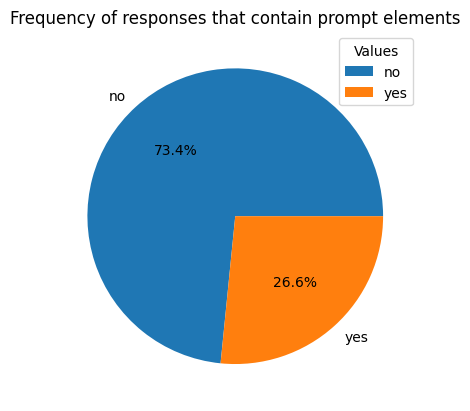

In [66]:
# Plotting the frequency as a pie chart
labels = frequency_elements.index
sizes = frequency_elements.values

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Frequency of responses that contain prompt elements")

# Add a legend
plt.legend(title="Values", loc="best")

plt.show()

### 5 - Whether the response continues with the prompt 

In [19]:
corpus_analysis_complete['continuation_of_prompt']

0        no
1       yes
2       yes
3       yes
4        no
       ... 
2064    yes
2065     no
2066    yes
2067     no
2068     no
Name: continuation_of_prompt, Length: 2069, dtype: object

In [20]:
frequency_continuation = corpus_analysis_complete['continuation_of_prompt'].value_counts()
frequency_continuation

continuation_of_prompt
no     1364
yes     705
Name: count, dtype: int64

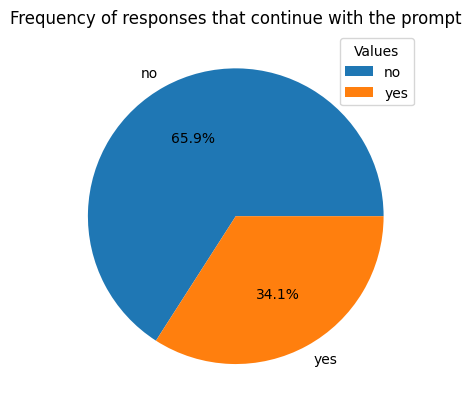

In [21]:
# Plotting the frequency as a pie chart
labels = frequency_continuation.index
sizes = frequency_continuation.values

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Frequency of responses that continue with the prompt")

# Add a legend
plt.legend(title="Values", loc="best")

plt.show()

### 6 - The amount of responses that can be considered a narrative response

In [22]:
corpus_analysis_complete['considered_as_narrative']

0        no
1       yes
2       yes
3       yes
4       yes
       ... 
2064     no
2065     no
2066     no
2067     no
2068     no
Name: considered_as_narrative, Length: 2069, dtype: object

In [23]:
frequency_narratives = corpus_analysis_complete['considered_as_narrative'].value_counts()
frequency_narratives

considered_as_narrative
no     1810
yes     259
Name: count, dtype: int64

In [24]:
narrative_responses = corpus_analysis_complete.loc[corpus_analysis_complete['considered_as_narrative'] == 'yes']
narrative_responses

,blog_name,title,description,post_url,date (YYYY-MM-DD),hashtags,short_url,writing_prompt_id,writing_prompt,total_amount_notes,...,theme,containing_elements,continuation_of_prompt,considered_as_narrative,narrative_agent,type_of_narrator,word_count_response,pos_tags_response,tokens_response,pos_counts_response
1,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. L...,https://writing-prompt-s.tumblr.com/post/71185...,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,You’ve accidentally summoned the Devil while c...,4245,...,"['Fantasy and Imaginative Realms', 'Existentia...",yes,yes,yes,UNKNOWN,UNKNOWN,17,"[NN, TO, VB, RP, NN, POS, NN, ., NNP, NN, MD, ...","[Time, to, pull, out, grandma, 's, cookbook, ....","{'NN': 4, 'TO': 1, 'VB': 3, 'RP': 1, 'POS': 1,..."
2,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. L...,https://writing-prompt-s.tumblr.com/post/71185...,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,You’ve accidentally summoned the Devil while c...,4245,...,"['Fantasy and Imaginative Realms', 'Existentia...",yes,yes,yes,TUMBLR,UNKNOWN,13,"[PRP, VBZ, VBG, TO, VB, TO, VB, PRP, JJR, IN, ...","[He, 's, going, to, have, to, offer, me, more,...","{'PRP': 3, 'VBZ': 1, 'VBG': 1, 'TO': 2, 'VB': ..."
3,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. L...,https://writing-prompt-s.tumblr.com/post/71185...,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,You’ve accidentally summoned the Devil while c...,4245,...,"['Fantasy and Imaginative Realms', 'Existentia...",yes,yes,yes,TUMBLR,EN,32,"[IN, CD, NN, IN, NN, VBD, IN, DT, NN, IN, PRP,...","[As, one, day, of, appraisal, turned, into, a,...","{'IN': 4, 'CD': 2, 'NN': 7, 'VBD': 4, 'DT': 3,..."
4,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. L...,https://writing-prompt-s.tumblr.com/post/71185...,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,You’ve accidentally summoned the Devil while c...,4245,...,"['Fantasy and Imaginative Realms', 'Existentia...",yes,no,yes,TUMBLR,CN,5,"[PRP, VBP, JJ, IN, NN]","[I, make, pasta, with, ketchup]","{'PRP': 1, 'VBP': 1, 'JJ': 1, 'IN': 1, 'NN': 1}"
6,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. L...,https://writing-prompt-s.tumblr.com/post/71185...,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,You’ve accidentally summoned the Devil while c...,4245,...,"['Fantasy and Imaginative Realms', 'Existentia...",yes,yes,yes,TUMBLR,CN,11,"[PRP, MD, VB, RB, JJR, JJ, VBG, TO, VB, DT, NN...","[I, will, have, much, more, fun, trying, to, p...","{'PRP': 1, 'MD': 1, 'VB': 2, 'RB': 1, 'JJR': 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,promptsforthestrugglingauthor,Writing Prompts Daily,<a href=https://promptsforthestrugglingauthor....,https://www.tumblr.com/blog/view/promptsforthe...,22-2-2023,"['writing prompt', 'writing', 'writers on tumb...",https://tmblr.co/ZnM30fdQKsireu00,wp242,Writing Prompt #2227“Well that went better tha...,251,...,"['Emotional and Personal Growth', 'Humor, Sati...",yes,yes,yes,IN,EN,132,"[NNS, VBN, TO, DT, JJ, NN, NN, ,, NNP, CC, NNP...","[Backs, pressed, to, a, half-destroyed, brick,...","{'NNS': 5, 'VBN': 6, 'TO': 6, 'DT': 6, 'JJ': 1..."
1988,promptsforthestrugglingauthor,Writing Prompts Daily,<a href=https://promptsforthestrugglingauthor....,https://www.tumblr.com/blog/view/promptsforthe...,21-2-2023,NaN,https://tmblr.co/ZnM30fdPoY9uam00,wp245,promptsforthestrugglingauthor:Writing Prompt #...,215,...,"['Emotional and Personal Growth', 'Personal Va...",yes,yes,yes,IN,EN,83,"[#, VBG, NNS, #, JJ, #, JJ, #, JJ, VBG, NN, VB...","[#, writing, prompts, #, ........................","{'#': 11, 'VBG': 4, 'NNS': 2, 'JJ': 12, 'NN': ..."
1995,promptsforthestrugglingauthor,Writing Prompts Daily,<a href=https://promptsforthestrugglingauthor....,https://www.tumblr.com/blog/view/promptsforthe...,21-2-2023,NaN,https://tmblr.co/Z

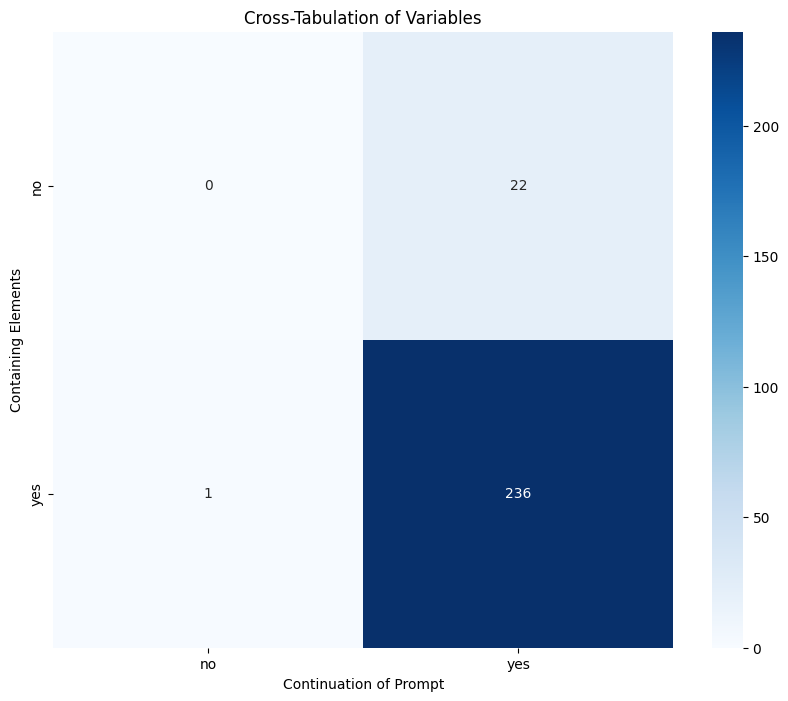

In [25]:
# Create a cross-tabulation of three variables
cross_tab = pd.crosstab(narrative_responses['containing_elements'], [narrative_responses['continuation_of_prompt']])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Continuation of Prompt')
plt.ylabel('Containing Elements')
plt.title('Cross-Tabulation of Variables')

plt.show()

### 7 - The amount of words per narrative response

In [26]:
# Apply the word count function to the 'Response' column
narrative_responses['word_count_response'] = narrative_responses['response'].apply(count_words)

C:\Users\Steven Steenge\AppData\Local\Temp\ipykernel_36048\3037427374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  narrative_responses['word_count_response'] = narrative_responses['response'].apply(count_words)


In [27]:
narrative_responses['word_count_response'].describe()

count     259.000000
mean       80.003861
std       191.302684
min         2.000000
25%        12.000000
50%        23.000000
75%        53.000000
max      2065.000000
Name: word_count_response, dtype: float64

### 8 - The type of words per narrative response

In [28]:
# Apply the function to extract POS tags and tokens to the 'response' column
narrative_responses['pos_tags_response'], narrative_responses['tokens_response'] = zip(*narrative_responses['response'].apply(extract_pos_tags_and_tokens))
# Apply the function to count POS tags for each response
narrative_responses['pos_counts_response'] = narrative_responses['response'].apply(count_pos_tags)

C:\Users\Steven Steenge\AppData\Local\Temp\ipykernel_36048\128965618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  narrative_responses['pos_tags_response'], narrative_responses['tokens_response'] = zip(*narrative_responses['response'].apply(extract_pos_tags_and_tokens))
C:\Users\Steven Steenge\AppData\Local\Temp\ipykernel_36048\128965618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  narrative_responses['pos_counts_response'] = narrative_responses['response'].apply(count_pos_tags)


In [29]:
narrative_responses[['pos_tags_response', 'tokens_response','pos_counts_response']]

,pos_tags_response,tokens_response,pos_counts_response
1,"[NN, TO, VB, RP, NN, POS, NN, ., NNP, NN, MD, ...","[Time, to, pull, out, grandma, 's, cookbook, ....","{'NN': 4, 'TO': 1, 'VB': 3, 'RP': 1, 'POS': 1,..."
2,"[PRP, VBZ, VBG, TO, VB, TO, VB, PRP, JJR, IN, ...","[He, 's, going, to, have, to, offer, me, more,...","{'PRP': 3, 'VBZ': 1, 'VBG': 1, 'TO': 2, 'VB': ..."
3,"[IN, CD, NN, IN, NN, VBD, IN, DT, NN, IN, PRP,...","[As, one, day, of, appraisal, turned, into, a,...","{'IN': 4, 'CD': 2, 'NN': 7, 'VBD': 4, 'DT': 3,..."
4,"[PRP, VBP, JJ, IN, NN]","[I, make, pasta, with, ketchup]","{'PRP': 1, 'VBP': 1, 'JJ': 1, 'IN': 1, 'NN': 1}"
6,"[PRP, MD, VB, RB, JJR, JJ, VBG, TO, VB, DT, NN...","[I, will, have, much, more, fun, trying, to, p...","{'PRP': 1, 'MD': 1, 'VB': 2, 'RB': 1, 'JJR': 1..."
...,...,...,...
1961,"[NNS, VBN, TO, DT, JJ, NN, NN, ,, NNP, CC, NNP...","[Backs, pressed, to, a, half-destroyed, brick,...","{'NNS': 5, 'VBN': 6, 'TO': 6, 'DT': 6, 'JJ': 1..."
1988,"[#, VBG, NNS, #, JJ, #, JJ, #, JJ, VBG, NN, VB...","[#, writing, prompts, #, ........................","{'#': 11, 'VBG': 4, 'NNS': 2, 'JJ': 12, 'NN': ..."
1995,"[NN, VBD, IN, NNP, ,, PRP$, JJ, NN, IN, ., PRP...","[Hero, stared, at, Villain, ,, her, bitter, ba...","{'NN': 75, 'VBD': 22, 'IN': 44, 'NNP': 29, ','..."
2003,"[#, VBG, NNS, #, JJ, #, JJ, #, JJ, VBG, NN, VB...","[#, writing, prompts, #, ........................","{'#': 11, 'VBG': 4, 'NNS': 2, 'JJ': 12, 'NN': ..."


In [30]:
# Create an empty defaultdict to store the word counts
word_counts = defaultdict(int)

# Iterate over the pos_counts_prompt column
for pos_counts_str in narrative_responses['pos_counts_prompt']:
    # Convert the string representation to a dictionary
    pos_counts = ast.literal_eval(pos_counts_str)
    
    # Iterate over the key-value pairs in the pos_counts dictionary
    for word, count in pos_counts.items():
        # Increment the count by the corresponding value
        word_counts[word] += count

# Create a DataFrame from the word counts dictionary
df_word_counts = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])

# Sort the DataFrame by count in descending order
df_word_counts = df_word_counts.sort_values(by='count', ascending=False)

# Reset the index of the DataFrame
df_word_counts = df_word_counts.reset_index().rename(columns={'index': 'word'})

# Display the top 10 most common words
top_10_words = df_word_counts.head(10)
print(top_10_words)

  word  count
0   NN   2031
1   IN   1283
2   DT   1195
3  PRP   1069
4   JJ    953
5    .    814
6  VBP    646
7   VB    634
8   RB    610
9    ,    577


In [31]:
# Apply the function to extract POS tags and tokens to the 'response' column
corpus_analysis_complete['pos_tags_response'], corpus_analysis_complete['tokens_response'] = zip(*corpus_analysis_complete['response'].apply(extract_pos_tags_and_tokens))
# Apply the function to count POS tags for each response
corpus_analysis_complete['pos_counts_response'] = corpus_analysis_complete['response'].apply(count_pos_tags)

### 9 - Narrative agent 

In [32]:
narrative_responses['narrative_agent'].value_counts()

narrative_agent
IN         134
TUMBLR      80
UNKNOWN     45
Name: count, dtype: int64

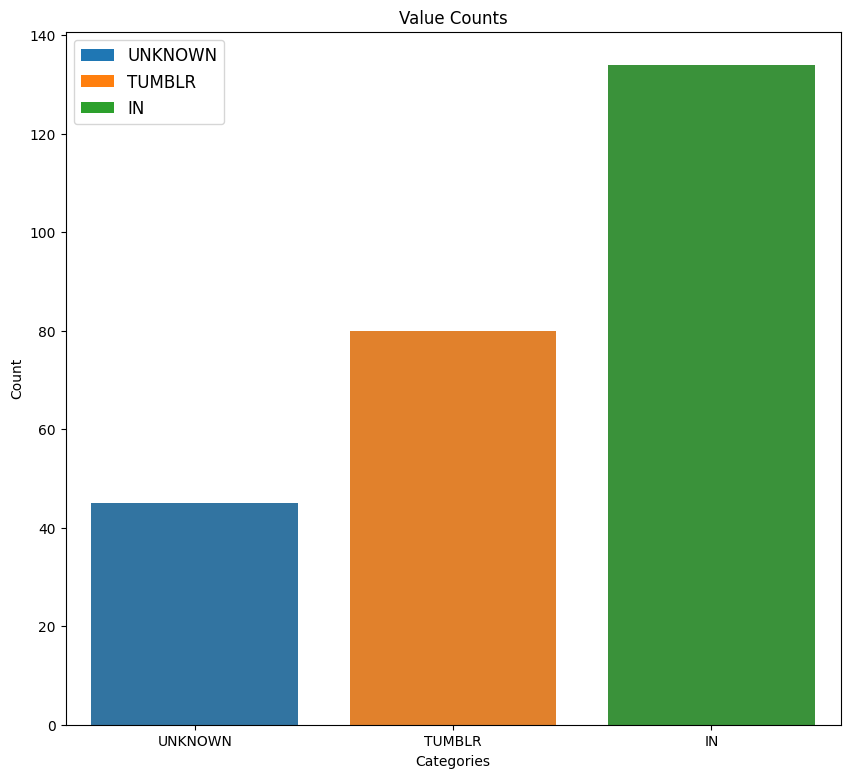

In [67]:
narrative_agent = narrative_responses['narrative_agent'].value_counts()

# Define a custom color palette
colors = ['tab:blue', 'tab:orange', 'tab:green']

plt.figure(figsize=(10, 9))
sns.countplot(data=narrative_responses, x='narrative_agent', palette=colors)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Value Counts')

# Create custom legend handles and labels with matching colors
legend_labels = ['UNKNOWN', 'TUMBLR', 'IN']
legend_handles = [Patch(facecolor=colors[i]) for i in range(len(legend_labels))]

plt.legend(legend_handles, legend_labels, fontsize=12)

plt.show()

### 10 - Type of narrator 

In [34]:
narrative_responses['type_of_narrator'].value_counts()

type_of_narrator
CN         101
EN          92
UNKNOWN     66
Name: count, dtype: int64

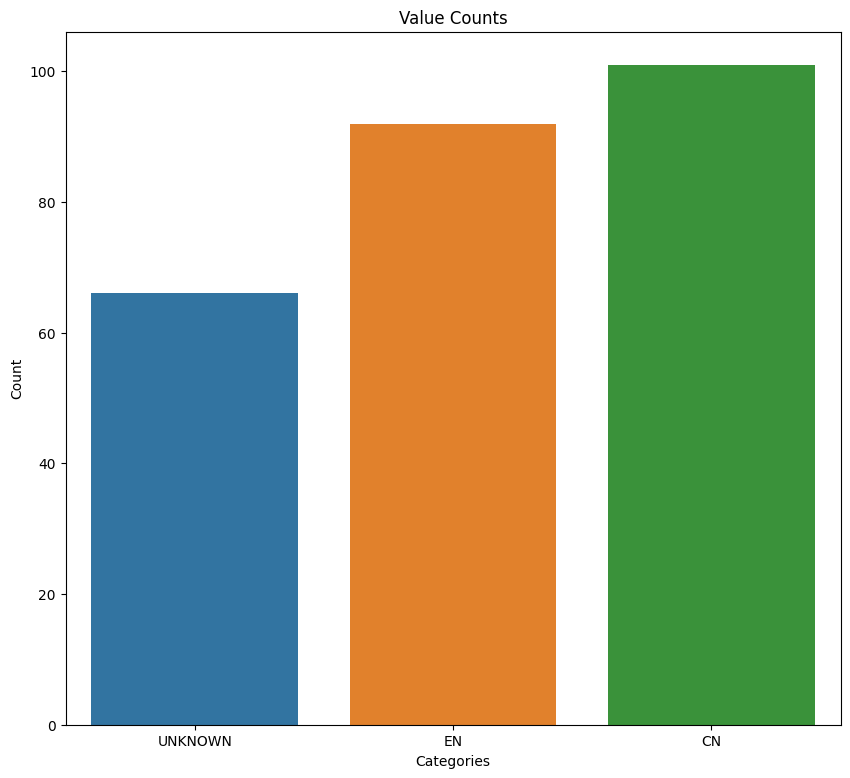

In [68]:
type_of_narrator = narrative_responses['type_of_narrator'].value_counts()

# Define a custom color palette
colors = ['tab:blue', 'tab:orange', 'tab:green']

plt.figure(figsize=(10, 9))
sns.countplot(data=narrative_responses, x='type_of_narrator', palette=colors)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Value Counts')

# Create custom legend handles and labels with matching colors
legend_labels = ['UNKNOWN', 'EN', 'CN']
legend_handles = [Patch(facecolor=colors[i]) for i in range(len(legend_labels))]

plt.show()

In [36]:
# Create a cross-tabulation of the two variables
cross_tab_nar_agent_type = pd.crosstab(narrative_responses['narrative_agent'], narrative_responses['type_of_narrator'])
cross_tab_nar_agent_type

type_of_narrator,CN,EN,UNKNOWN
narrative_agent,,,
IN,57,51,26
TUMBLR,40,26,14
UNKNOWN,4,15,26


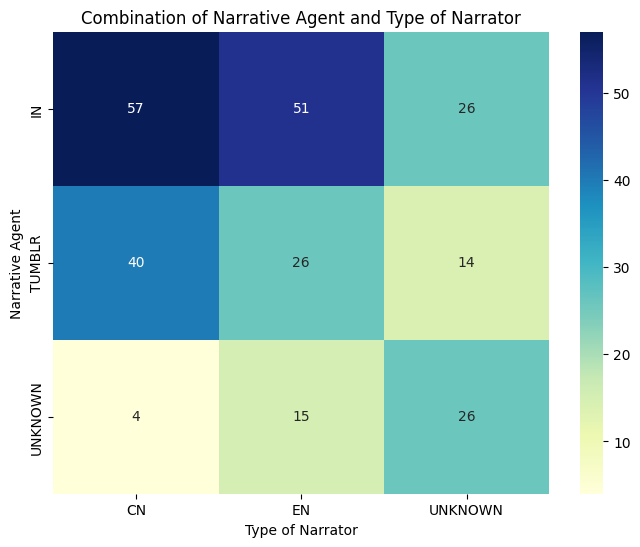

In [37]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the cross-tabulation as a heatmap
sns.heatmap(cross_tab_nar_agent_type, annot=True, cmap='YlGnBu', fmt='d', ax=ax)

# Set the axis labels and title
ax.set_xlabel('Type of Narrator')
ax.set_ylabel('Narrative Agent')
ax.set_title('Combination of Narrative Agent and Type of Narrator')

# Show the plot
plt.show()

### 11 - Hashtags

##### Step 1: Create a function that extracts hashtags from a text

In [38]:
# Function to extract hashtags from a text
def extract_hashtags(text):
    if isinstance(text, str):
        hashtags = re.findall(r"#\w+(?:\s+\w+){0,7}", text)
        return hashtags
    else: return []


# Apply the function to the 'Text' column and create a new column 'Hashtags'
corpus_analysis_complete['hashtags_response'] = corpus_analysis_complete['response'].apply(extract_hashtags)

# Print the dataframe
corpus_analysis_complete

,blog_name,title,description,post_url,date (YYYY-MM-DD),hashtags,short_url,writing_prompt_id,writing_prompt,total_amount_notes,...,containing_elements,continuation_of_prompt,considered_as_narrative,narrative_agent,type_of_narrator,word_count_response,pos_tags_response,tokens_response,pos_counts_response,hashtags_response
0,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. L...,https://writing-prompt-s.tumblr.com/post/71185...,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,You’ve accidentally summoned the Devil while c...,4245,...,yes,no,no,NaN,NaN,5,"[WP, ,, DT, JJ, NN, NN, .]","[What, ,, no, golden, offset, spatula, ?]","{'WP': 1, ',': 1, 'DT': 1, 'JJ': 1, 'NN': 2, '...",[]
1,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. L...,https://writing-prompt-s.tumblr.com/post/71185...,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,You’ve accidentally summoned the Devil while c...,4245,...,yes,yes,yes,UNKNOWN,UNKNOWN,17,"[NN, TO, VB, RP, NN, POS, NN, ., NNP, NN, MD, ...","[Time, to, pull, out, grandma, 's, cookbook, ....","{'NN': 4, 'TO': 1, 'VB': 3, 'RP': 1, 'POS': 1,...",[]
2,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. L...,https://writing-prompt-s.tumblr.com/post/71185...,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,You’ve accidentally summoned the Devil while c...,4245,...,yes,yes,yes,TUMBLR,UNKNOWN,13,"[PRP, VBZ, VBG, TO, VB, TO, VB, PRP, JJR, IN, ...","[He, 's, going, to, have, to, offer, me, more,...","{'PRP': 3, 'VBZ': 1, 'VBG': 1, 'TO': 2, 'VB': ...",[]
3,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. L...,https://writing-prompt-s.tumblr.com/post/71185...,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,You’ve accidentally summoned the Devil while c...,4245,...,yes,yes,yes,TUMBLR,EN,32,"[IN, CD, NN, IN, NN, VBD, IN, DT, NN, IN, PRP,...","[As, one, day, of, appraisal, turned, into, a,...","{'IN': 4, 'CD': 2, 'NN': 7, 'VBD': 4, 'DT': 3,...",[]
4,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. L...,https://writing-prompt-s.tumblr.com/post/71185...,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,You’ve accidentally summoned the Devil while c...,4245,...,yes,no,yes,TUMBLR,CN,5,"[PRP, VBP, JJ, IN, NN]","[I, make, pasta, with, ketchup]","{'PRP': 1, 'VBP': 1, 'JJ': 1, 'IN': 1, 'NN': 1}",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,promptsforthestrugglingauthor,Writing Prompts Daily,<a href=https://promptsforthestrugglingauthor....,https://www.tumblr.com/blog/view/promptsforthe...,18-2-2023,"['writing prompt', 'writing', 'writers on tumb...",https://tmblr.co/ZnM30fdP3TYvGm00,wp250,Writing Prompt #2223Being undead for centuries...,156,...,no,yes,no,NaN,NaN,130,"[NNP, VBD, NN, VBZ, VBN, VBG, IN, JJ, NN, IN, ...","[Unless, said, character, has, been, living, i...","{'NNP': 1, 'VBD': 1, 'NN': 16, 'VBZ': 2, 'VBN'...","[#writing prompt, #writing, #oc prompt, #reblo..."
2065,promptsforthestrugglingauthor,Writing Prompts Daily,<a href=https://promptsforthestrugglingauthor....,https://www.tumblr.com/blog/view/promptsforthe...,18-2-2023,"['writing prompt', 'writing', 'writers on tumb...",https://tmblr.co/ZnM30fdP3TYvGm00,wp250,Writing Prompt #2223Being undead for centuries...,156,...,no,no,no,NaN,NaN,14,"[#, VBG, #, VBG, NNS, #, JJ, #, JJ, #, VBG, JJ...","[#, writing, #, writing, prompts, #, writeblr,...","{'#': 10, 'VBG': 3, 'NNS': 4, 'JJ': 5, 'NN': 1...","[#writing, #writing prompts, #writeblr, #promp..."
2066,promptsforthestrugglingauthor,Writing Prompts Daily,<a href=https://promptsforthestrugglingauthor....,https://www.tumblr.com/blog/view/promptsforthe...,18-2-2023,"['writing prompt', 'writing', 'writers on tumb...",https://tmblr.co/ZnM30fdP3TYvGm00,wp250,Writing Prompt #2223Being undead for centuries...,156,...,no,yes,no,NaN,NaN,4,"[#, :, NN, VBZ, IN, PRP, .]","[#, ..., merline, is, that, you, ?]","{'#':

###### Step 2: Make a subset of the data according to the writing prompt account

In [39]:
tum_writing_prompt_s_df_responses = corpus_analysis_complete.loc[corpus_analysis_complete['blog_name'] == 'writing-prompt-s']
tum_writingprompts_df_responses = corpus_analysis_complete.loc[corpus_analysis_complete['blog_name'] == 'writingprompts']
tum_creativepromptsforwriting_df_responses = corpus_analysis_complete.loc[corpus_analysis_complete['blog_name'] == 'creativepromptsforwriting']
tum_dropkickwritersblock_df_responses = corpus_analysis_complete.loc[corpus_analysis_complete['blog_name'] == 'dropkickwritersblock']
tum_promptsforthestrugglingauthor_df_responses = corpus_analysis_complete.loc[corpus_analysis_complete['blog_name'] == 'promptsforthestrugglingauthor']


##### Step 3: Re-use the hashtag function from notebook 3: layer 3 - writing prompts

In [40]:
def hashtag_counts_df(df, column):
    # Credits to https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe

    df = pd.DataFrame(df[column].value_counts())
    df.index.name = column
    df.columns = ['count']
    df = df.rename_axis('hashtags').reset_index()
    return df

##### Step 4: Apply the function to the entire corpus, and to each Tumblr account
##### Hashtags for the entire corpus

In [41]:
response_hashtags = hashtag_counts_df(corpus_analysis_complete, 'hashtags_response')
response_hashtags

,hashtags,count
0,[],765
1,[#writing prompt],62
2,[#writing prompts],42
3,[#prompts],32
4,"[#writers, #writers on tumblr, #writing prompt...",29
...,...,...
783,[#I see he],1
784,"[#ty bread, #writing ideas]",1
785,"[#not saying to read my fic but uhhhh, #gone t...",1
786,[#how to write],1


In [42]:
print("This is the length of unique combinations of hashtags:", len(response_hashtags))
print("This is the total amount of unique combinations:", response_hashtags['count'].sum())

This is the length of unique combinations of hashtags: 788
This is the total amount of unique combinations: 2069


##### Hashtags under Tumblr user writing-prompt_s

In [43]:
hashtag_count_writing_prompt_s_df_responses = hashtag_counts_df(tum_writing_prompt_s_df_responses, 'hashtags_response')
print(hashtag_count_writing_prompt_s_df_responses.shape)
hashtag_count_writing_prompt_s_df_responses

(276, 2)


,hashtags,count
0,[],582
1,"[#writers, #writers on tumblr, #writing prompt...",29
2,[#writing prompts],15
3,[#writing prompt],13
4,"[#daily writing prompt, #writing prompt]",8
...,...,...
271,"[#ha, #writing prompt]",1
272,"[#writing prompt, #villain, #villains]",1
273,[#omg i have a characters that],1
274,"[#wait a minute, #there, #something amazing, #...",1


In [44]:
print("This is the length of unique combinations of hashtags:", len(hashtag_count_writing_prompt_s_df_responses))
print("This is the total amount of unique combinations:", hashtag_count_writing_prompt_s_df_responses['count'].sum())

This is the length of unique combinations of hashtags: 276
This is the total amount of unique combinations: 940


##### Hashtags under Tumblr user writingprompts

In [45]:
hashtag_count_writingprompts_df_responses = hashtag_counts_df(tum_writingprompts_df_responses, 'hashtags_response')
print(hashtag_count_writingprompts_df_responses.shape)
hashtag_count_writingprompts_df_responses

(33, 2)


,hashtags,count
0,[],74
1,"[#writing, #writing prompt, #education]",8
2,"[#Instagram, #IFTTT, #writing prompts]",5
3,[#writing prompt],4
4,[#writing prompts],2
5,"[#Fuck schools, #fuck parents who put this muc...",1
6,"[#they poop, #they squeal, #they ruUUMmmbbBle,...",1
7,"[#writing prompt, #writing, #zabyvchivyy promp...",1
8,[#Infinitebowl writing fiction writingprompts ...,1
9,"[#this is a REALLY good way to think, #I find ...",1


In [46]:
print("This is the length of unique combinations of hashtags:", len(hashtag_count_writingprompts_df_responses))
print("This is the total amount of unique combinations:", hashtag_count_writingprompts_df_responses['count'].sum())

This is the length of unique combinations of hashtags: 33
This is the total amount of unique combinations: 121


##### Hashtags under Tumblr user creativepromptsforwriting

In [47]:
hashtag_count_creativepromptsforwriting_df_responses = hashtag_counts_df(tum_creativepromptsforwriting_df_responses, 'hashtags_response')
print(hashtag_count_creativepromptsforwriting_df_responses.shape)
hashtag_count_creativepromptsforwriting_df_responses

(304, 2)


,hashtags,count
0,[],51
1,[#prompts],20
2,[#writing prompts],17
3,[#writing prompt],7
4,[#writing],7
...,...,...
299,"[#prompts, #Kristanna, #Kristoff and Anna, #an...",1
300,"[#writing, #writing ideas, #reblogging to find...",1
301,"[#oooooo, #save, #hello again royalty au that ...",1
302,"[#pokemon, #lightsunshipping, #sunflowershippi...",1


In [48]:
print("This is the length of unique combinations of hashtags:", len(hashtag_count_creativepromptsforwriting_df_responses))
print("This is the total amount of unique combinations:", hashtag_count_creativepromptsforwriting_df_responses['count'].sum())

This is the length of unique combinations of hashtags: 304
This is the total amount of unique combinations: 434


##### Hashtags under Tumblr user dropkickwritersblock

In [49]:
hashtag_count_dropkickwritersblock_df_responses = hashtag_counts_df(tum_dropkickwritersblock_df_responses, 'hashtags_response')
print(hashtag_count_dropkickwritersblock_df_responses.shape)
hashtag_count_dropkickwritersblock_df_responses

(29, 2)


,hashtags,count
0,"[#topical prompt, #daily prompt, #writing prom...",18
1,[],11
2,"[#daily writing prompt, #writing prompt]",3
3,[#writing prompts],2
4,"[#writing prompts, #writing ideas, #writing he...",1
5,[#prompts],1
6,[#Prompt],1
7,"[#writing prompts, #characters]",1
8,[#me when I write my mothers autobiography],1
9,"[#writing prompt, #saving for later]",1


In [50]:
print("This is the length of unique combinations of hashtags:", len(hashtag_count_dropkickwritersblock_df_responses))
print("This is the total amount of unique combinations:", hashtag_count_dropkickwritersblock_df_responses['count'].sum())

This is the length of unique combinations of hashtags: 29
This is the total amount of unique combinations: 59


##### Hashtags under Tumblr user promptsforthestrugglingauthor

In [51]:
hashtag_count_promptsforthestrugglingauthor_df_responses = hashtag_counts_df(tum_promptsforthestrugglingauthor_df_responses, 'hashtags_response')
print(hashtag_count_promptsforthestrugglingauthor_df_responses.shape)
hashtag_count_promptsforthestrugglingauthor_df_responses

(178, 2)


,hashtags,count
0,[],47
1,[#writing prompt],38
2,"[#writing prompt, #writing, #writers on tumblr...",18
3,"[#writing prompt, #dialogue prompt]",12
4,[#prompt],10
...,...,...
173,"[#prompt, #writing prompt, #inspi for meee, #r...",1
174,"[#writing prompt, #writing, #writers on tumblr...",1
175,[#edward and alphonse elric],1
176,"[#isa marsaii, #illimaia, #caye writes]",1


In [52]:
print("This is the length of unique combinations of hashtags:", len(hashtag_count_promptsforthestrugglingauthor_df_responses))
print("This is the total amount of unique combinations:", hashtag_count_promptsforthestrugglingauthor_df_responses['count'].sum())

This is the length of unique combinations of hashtags: 178
This is the total amount of unique combinations: 515


There are 788 unique combinations of hashtags found within the responses, which together make up the total of 2069 responses. 765 of these responses had no hashtags.

Under Tumblr user writing_prompt_s, 276 such unique combinations were found within the responses, which accounts for a total of 940 hashtags. 582 of these responses had no hashtags. 

Under Tumblr user writingprompts, 33 such unique combinations were found within the responses, which accounts for a total of 121 hashtags. 74 of these responses had no hashtags. 

Under Tumblr user creativepromptsforwriting, 304 such unique combinations were found within the responses, which accounts for a total of 434 hashtags. 51 of these responses had no hashtags. 

Under Tumblr user dropkickwritersblock, 29 such unique combinations were found within the responses, which accounts for a total of 59 hashtags. 11 of these responses had no hashtags. 

Under Tumblr user promptsforthestrugglingauthor, 178 such unique combinations were found within the responses, which accounts for a total of 515 hashtags. 47 of these responses had no hashtags. 

###### Step 5: Seperate the hashtags

In [53]:
# Create an empty list to store the hashtag counts
hashtags_counts = []

# Iterate over the rows of the original DataFrame
for _, row in response_hashtags.iterrows():
    # Split the hashtags string into a list of hashtags
    hashtags_list = row['hashtags']
    # Iterate over the hashtags in the list
    for hashtag in hashtags_list:
        # Check if the hashtag is already in the list
        existing_hashtag = next((h for h in hashtags_counts if h['hashtag'] == hashtag), None)
        if existing_hashtag:
            # If it is, increment the count for that hashtag
            existing_hashtag['count'] += 1
        else:
            # If it's not, add a new dictionary to the list with the hashtag and count of 1
            hashtags_counts.append({'hashtag': hashtag, 'count': 1})

# Create a DataFrame from the list of hashtag counts
df_hashtags_responses = pd.DataFrame(hashtags_counts)

# Sort the new DataFrame by count in descending order
df_hashtags_responses = df_hashtags_responses.sort_values(by='count', ascending=False)

In [54]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_hashtags_responses

,hashtag,count
1,#writing prompts,131
0,#writing prompt,117
10,#writing,104
5,#writeblr,57
2,#prompts,55
6,#writing inspiration,40
24,#prompt,35
4,#writers on tumblr,32
60,#prompt list,30
14,#dialogue prompt,29


In [56]:
df_hashtags_responses.to_csv('responses_hashtag_seperate_count.csv')
df_hashtags_responses.to_excel('responses_hashtag_seperate_count.xlsx')

# Manual content analysis was applied

In [57]:
responses_hashtag_content = pd.read_csv('responses_hashtag_seperate_count_content.csv')
responses_hashtag_content = responses_hashtag_content.drop('Unnamed: 0', axis=1)
responses_hashtag_content

,hashtag,count,category
0,#writing prompts,131,"Writing, Writing Prompts and Ideas"
1,#writing prompt,117,"Writing, Writing Prompts and Ideas"
2,#writing,104,"Writing, Writing Prompts and Ideas"
3,#writeblr,57,Writing Community
4,#prompts,55,"Writing, Writing Prompts and Ideas"
5,#writing inspiration,40,Writing Inspiration
6,#prompt,35,"Writing, Writing Prompts and Ideas"
7,#writers on tumblr,32,Writing Community
8,#prompt list,30,"Writing, Writing Prompts and Ideas"
9,#dialogue prompt,29,"Writing, Writing Prompts and Ideas"


In [59]:
responses_hashtag_content['category'].value_counts()

category
Miscellaneous                         957
Specific Genres and Themes            143
Writing, Writing Prompts and Ideas     88
Writing Inspiration                    44
For Later                              44
Writing Community                      17
Self-Reference                         14
Interactive and Engaging               14
Organization                           10
Name: count, dtype: int64

In [ ]:
hashtags_by_category = responses_hashtag_content.groupby('category')['hashtag'].apply(list).reset_index()

# Print the hashtags by category
for index, row in hashtags_by_category.iterrows():
    category = row['category']
    hashtags = row['hashtag'][:5]
    print(f"Category: {category}")
    print(f"Hashtags: {hashtags}")
    print()

In [65]:
# Group the data by category and sum the counts
category_counts = responses_hashtag_content.groupby('category')['count'].sum()

# Display the total count for each category
category_counts.sort_values()

category
Organization                            17
Interactive and Engaging                63
Self-Reference                          64
For Later                               71
Writing Community                      145
Writing Inspiration                    148
Specific Genres and Themes             244
Writing, Writing Prompts and Ideas     837
Miscellaneous                         1042
Name: count, dtype: int64

In [ ]:
# Count the number of hashtags in each category
category_counts = responses_hashtag_content['category'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Hashtags by Category')
plt.xticks(rotation=45)
plt.savefig('Result_Hashtags in Responses by Category')
plt.show()

In [ ]:
# Concatenate hashtags by category
hashtags_by_category = responses_hashtag_content.groupby('category')['hashtag'].apply(' '.join)

# Create a word cloud for each category
for category, hashtags in hashtags_by_category.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words = 50).generate(hashtags)

    # Plot the word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Hashtags - {category}')
    plt.savefig('Result_Hashtags_Responses_wordcloud')
    plt.show()

# Apply functions to corpus_analysis_complete, to save it

In [ ]:
# Apply the word count function to the 'Response' column
corpus_analysis_complete['word_count_response'] = corpus_analysis_complete['response'].apply(count_words)

# Apply the function to extract POS tags and tokens to the 'response' column
corpus_analysis_complete['pos_tags_response'], corpus_analysis_complete['tokens_response'] = zip(*corpus_analysis_complete['response'].apply(extract_pos_tags_and_tokens))

# Apply the function to count POS tags for each response
corpus_analysis_complete['pos_counts_response'] = corpus_analysis_complete['response'].apply(count_pos_tags)

# Saving the datasets

In [ ]:
#Save the narrative responses as a csv file
narrative_responses = narrative_responses.drop('Unnamed: 0', axis = 1)
narrative_responses.to_csv('narrative_responses.csv')

In [ ]:
# Save the complete dataset
corpus_analysis_complete = corpus_analysis_complete.drop('Unnamed: 0', axis = 1)
corpus_analysis_complete.to_csv('corpus_complete_with_analysis.csv')
corpus_analysis_complete.to_excel('corpus_complete_with_analysis.xlsx')

# Inspecting again

In [ ]:
narrative_responses.info()

In [ ]:
narrative_responses.describe()

In [ ]:
corpus_analysis_complete.info()

In [ ]:
corpus_analysis_complete.describe()

In [ ]:
#narrative_responses.loc[narrative_responses['writing_prompt_id'] == 'wp024']
#narrative_responses.loc[narrative_responses['writing_prompt_id'] == 'wp056']
#narrative_responses.loc[narrative_responses['writing_prompt_id'] == 'wp105']
narrative_responses.loc[narrative_responses['narrative_agent'] == 'TUMBLR']
#narrative_responses.loc[narrative_responses['writing_prompt_id'] == 'wp242']